In [1]:
"""
error_analysis.py

This script performs error analysis on result JSON files generated by any of the approaches.
It uses the shared analyze_errors() function from factchecker_base.
"""

import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import os
import re
import matplotlib
# matplotlib.rcParams['font.family'] = 'TimesNewRoman'

# Save and Load Functions

In [2]:
def save_to_json(data, file_path):
    """
    Save a list of dictionaries to a JSON file.
    """
    try:
        with open(file_path, "w") as json_file:
            json.dump(data, json_file, indent=2)
        print(f"Data saved to {file_path}")
    except Exception as e:
        print(f"Error saving data to {file_path}: {e}")

def load_json(file_path):
    """
    Load a JSON file containing a list of dictionaries.
    """
    try:
        with open(file_path, "r") as json_file:
            data = json.load(json_file)
        return data
    except Exception as e:
        print(f"Error loading JSON file: {e}")
        return []


In [3]:
def accuracy(predictions):
    
    correct_predictions = sum(1 for p in predictions if p['true_response'] == p['predicted_response'])
    total_predictions = len(predictions)

    accuracy = (correct_predictions / total_predictions) * 100

    return (accuracy)

In [4]:
def load_accuracies_from_folder(folder_path):
    accuracies = []  # List to store accuracies
    filenames = []   # List to store the filenames
    
    # Iterate through files in the folder
    for filename in os.listdir(folder_path):
        if filename.startswith('results') and filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            
            # Load predictions from JSON file
            with open(file_path, 'r') as file:
                predictions = json.load(file)
                
                # Append accuracy and filename
                accuracies.append(accuracy(predictions))
                filenames.append(filename)
    
    return accuracies, filenames

# Example usage
folder_path = '../docs/results'  # Replace with the path to your folder
accuracies, filenames = load_accuracies_from_folder(folder_path)
sorted_accuracies, sorted_filenames = zip(*sorted(zip(accuracies, filenames), reverse=True))

# Print the accuracies and filenames
for acc, filename in zip(sorted_accuracies, sorted_filenames):
    print(f"Accuracy: {acc:.2f}%, Filename: {filename}")

Accuracy: 88.93%, Filename: results_with_cells_phi4:latest_test_examples_1695_zero_shot_naturalized.json
Accuracy: 88.58%, Filename: results_with_cells_phi4:latest_test_examples_1695_zero_shot_markdown.json
Accuracy: 88.51%, Filename: results_with_cells_phi4:latest_test_examples_1380_chain_of_thought_naturalized.json
Accuracy: 88.03%, Filename: results_with_cells_phi4:latest_test_examples_1369_chain_of_thought_markdown.json
Accuracy: 87.23%, Filename: results_with_cells_phi4:latest_test_examples_1695_zero_shot_json.json
Accuracy: 86.30%, Filename: results_with_cells_phi4:latest_test_examples_1695_zero_shot_html.json
Accuracy: 85.51%, Filename: results_with_cells_deepseek-r1:32b_test_examples_765_zero_shot_naturalized.json
Accuracy: 85.43%, Filename: results_with_cells_phi4:latest_test_examples_1356_chain_of_thought_json.json
Accuracy: 85.32%, Filename: results_with_cells_phi4:latest_test_examples_1360_chain_of_thought_html.json
Accuracy: 85.29%, Filename: results_with_cells_deepseek-r1

In [5]:
folder_path = 'results_20250212'  # Replace with the path to your folder
accuracies, filenames = load_accuracies_from_folder(folder_path)
sorted_accuracies, sorted_filenames = zip(*sorted(zip(accuracies, filenames), reverse=True))

# Print the accuracies and filenames
for acc, filename in zip(sorted_accuracies, sorted_filenames):
    print(f"Accuracy: {acc:.2f}%, Filename: {filename}")

Accuracy: 81.85%, Filename: results_CodeGeneration_test_examples_zero_shot_naturalized_phi4.json


In [6]:
def top_10_accuracies(accuracies, filenames):
    # Combine accuracies and filenames into a list of tuples
    accuracy_filename_pairs = list(zip(accuracies, filenames))
    
    # Sort the list by accuracy in descending order
    sorted_accuracy_filename_pairs = sorted(accuracy_filename_pairs, key=lambda x: x[0], reverse=True)
    
    # Get the top 10 accuracies and filenames
    top_10 = sorted_accuracy_filename_pairs[:10]
    
    # Separate the top 10 accuracies and filenames
    top_10_accuracies = [pair[0] for pair in top_10]
    top_10_filenames = [pair[1] for pair in top_10]
    
    return top_10_accuracies, top_10_filenames

# Example usage
top_10_accuracies_list, top_10_filenames_list = top_10_accuracies(accuracies, filenames)

# Print the results
print("Top 10 Accuracies:")
for acc, name in zip(top_10_accuracies_list, top_10_filenames_list):
    print(f"{name}: {acc:.2f}%")

Top 10 Accuracies:
results_CodeGeneration_test_examples_zero_shot_naturalized_phi4.json: 81.85%


In [7]:
def transform_filenames(filenames):
    transformed_filenames = []

    # Define the pattern to match the unwanted parts of the filename
    pattern = r"results_with_cells[:]?([\w\-]+)(?:[:]\w+)?_test_examples_\d+_(.*)\.json"

    # Iterate through each filename and apply the transformation
    for filename in filenames:
        match = re.match(pattern, filename)
        if match:
            model = match.group(1).lstrip('_')  # Remove the leading underscore from the model
            prompt_engineering = match.group(2)  # Extract the prompt engineering part
            transformed_filename = f"{model} {prompt_engineering.replace('_', ' ')}"
            transformed_filenames.append(transformed_filename)
        else:
            # If the filename does not match the expected pattern, append it as is
            transformed_filenames.append(filename)

    return transformed_filenames



top_10_filenames_list = transform_filenames(top_10_filenames_list)
for f in top_10_filenames_list:
    print(f)

results_CodeGeneration_test_examples_zero_shot_naturalized_phi4.json


In [8]:
def load_top_10_files(accuracies, filenames, folder_path):
    # Get the top 10 accuracies and corresponding filenames
    top_10_accuracies_list, top_10_filenames_list = top_10_accuracies(accuracies, filenames)
    
    top_10_files_data = []  # List to store the data of the top 10 files

    # Load the predictions from each of the top 10 files
    for filename in top_10_filenames_list:
        file_path = os.path.join(folder_path, filename)
        
        # Open the JSON file and load its content into a list of dictionaries
        with open(file_path, 'r') as file:
            file_data = json.load(file)
            top_10_files_data.append(file_data)
    
    return top_10_files_data

# Example usage
top_10_files_data = load_top_10_files(accuracies, filenames, folder_path)

# Plot Functions

## Plot Misclassifications per categories

In [9]:
def calculate_misclassifications(predictions, categorised_claims, category_misclassifications):
    """
    Calculates the misclassification percentage for each category, based on the new structure where
    true_response is in the predictions.

    Args:
    - predictions (list of dicts): Predictions made by the model.
    - categorised_claims (list of dicts): Claims categorized under different labels.

    Returns:
    - dict: A dictionary with categories as keys and misclassification percentages as values.
    """
    # Initialize counters for total claims and misclassifications per category
    category_counts = {category: 0 for category in category_misclassifications}
    category_misclassifications = {category: 0 for category in category_misclassifications}

    for prediction in predictions:
        claim = prediction["claim"]
        true_response = prediction["true_response"]
        predicted_response = prediction["predicted_response"]
        
        # Find the claim in the categorised_claims
        claim_data = next((item for item in categorised_claims if item["claim"] == claim), None)
        
        if claim_data:
            # Check if the prediction is misclassified
            is_misclassified = true_response != predicted_response

            # Loop through each category in the claim and update misclassification counts
            for category in category_counts:
                if category in claim_data and claim_data[category]:
                    # If the claim is part of the category, update the counts
                    category_counts[category] += 1
                    if is_misclassified:
                        category_misclassifications[category] += 1

    # Calculate the percentage of misclassifications for each category
    category_percentages = {
        category: (category_misclassifications[category] / category_counts[category] * 100)
        if category_counts[category] > 0 else 0
        for category in category_counts
    }

    return category_percentages

In [10]:
def plot_misclassifications(category_percentages):
    """
    Plots the misclassification percentages for each category.

    Args:
    - category_percentages (dict): A dictionary with categories as keys and misclassification percentages as values.
    """
    categories = list(category_percentages.keys())
    percentages = list(category_percentages.values())
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(categories, percentages, color='r')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Misclassification Percentage (%)')
    ax.set_title('Misclassification Percentage per Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
def plot_misclassifications_with_overall_misclassification(category_percentages, predictions):
    """
    Plots the misclassification percentages for each category and adds a dashed horizontal line 
    representing the overall accuracy of the classifications.

    Args:
    - category_percentages (dict): A dictionary with categories as keys and misclassification percentages as values.
    - predictions (list of dicts): Predictions made by the model.
    """
    categories = list(category_percentages.keys())
    percentages = list(category_percentages.values())

    # Compute overall accuracy
    total_predictions = len(predictions)
    total_misclassifications = sum(1 for p in predictions if p["true_response"] != p["predicted_response"])
    overall_accuracy = total_misclassifications / total_predictions * 100

    # Plot histogram
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(categories, percentages, color='r', alpha=0.7, label='Misclassification %')

    # Add horizontal line for overall accuracy
    ax.axhline(y=overall_accuracy, color='b', linestyle='dashed', linewidth=2, label=f'Overall Misclassification Rate: {overall_accuracy:.2f}%')

    # Labels and title
    ax.set_xlabel('Categories')
    ax.set_ylabel('Misclassification Percentage (%)')
    ax.set_title('Misclassification Percentage per Category')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Plot category co-occurences

In [12]:
def plot_category_cooccurrence(categorised_claims):
    # Extract all unique categories
    categories = set()
    for claim in categorised_claims:
        categories.update(claim.keys())
    categories.discard("ID")  # Remove non-category fields
    categories.discard("claim")
    
    # Initialize co-occurrence matrix
    category_list = sorted(categories)
    cooccurrence_matrix = pd.DataFrame(0, index=category_list, columns=category_list)
    
    # Populate co-occurrence matrix
    for claim in categorised_claims:
        active_categories = [cat for cat in category_list if claim.get(cat, False)]
        for i in range(len(active_categories)):
            for j in range(i, len(active_categories)):
                cooccurrence_matrix.loc[active_categories[i], active_categories[j]] += 1
                if i != j:
                    cooccurrence_matrix.loc[active_categories[j], active_categories[i]] += 1
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cooccurrence_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.title("Category Co-occurrence Heatmap")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

## Count claims per categories

In [13]:
def count_claims_per_category(categorised_claims):
    # Initialize a defaultdict to store counts for each category
    category_counts = defaultdict(int)
    
    # Loop through each claim in categorised_claims
    for claim_data in categorised_claims:
        # Loop through each key in the claim (excluding ID and claim text)
        for category, is_present in claim_data.items():
            # Only count if the category is a boolean and is True
            if category != "ID" and category != "claim" and is_present:
                category_counts[category] += 1
    
    return category_counts

def plot_category_counts(category_counts):
    # Create a bar plot for category counts
    categories = list(category_counts.keys())
    counts = list(category_counts.values())
    
    # Create the bar plot
    bars = plt.bar(categories, counts, color='skyblue')
    
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Number of Claims')
    plt.title('Number of Claims per Category')
    plt.xticks(rotation=45, ha="right")
    
    # Annotate each bar with the count value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(yval), ha='center', va='bottom')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

## Assess performance of multiple models

In [14]:
def plot_comparison(model_errors_list, accuracy_list, model_names):
    # Define categories (keys in the dictionaries)
    categories = list(model_errors_list[0].keys())  # Assuming all models have the same categories
    
    # Create x positions for the bars
    x = np.arange(len(categories))
    
    # Set width of bars
    width = 0.8 / len(model_errors_list)  # Adjust width based on the number of models
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot bars for each model
    for i, (model_errors, accuracy, model_name) in enumerate(zip(model_errors_list, accuracy_list, model_names)):
        model_values = list(model_errors.values())
        ax.bar(x + i * width - (width * (len(model_errors_list) - 1)) / 2, model_values, width, label=f'{model_name} (Accuracy: {accuracy:.2f}%)')

    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('Categories')
    ax.set_ylabel('Misclassification Rate (%)')
    ax.set_title('Model Performance Comparison per Category')
    
    # Set x-axis positions and labels outside the plot area
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=30, ha='right', fontsize=10)
    
    # Adjust the layout to prevent overlap of labels
    plt.subplots_adjust(bottom=0.2)  # Adjust bottom space to make room for x-axis labels
    
    # Add a legend with smaller font size
    ax.legend(fontsize=9)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot

In [15]:
predictions_file_name = "../docs/results/results_with_cells_phi4:latest_test_examples_1695_zero_shot_html.json"
predictions = load_json(predictions_file_name)

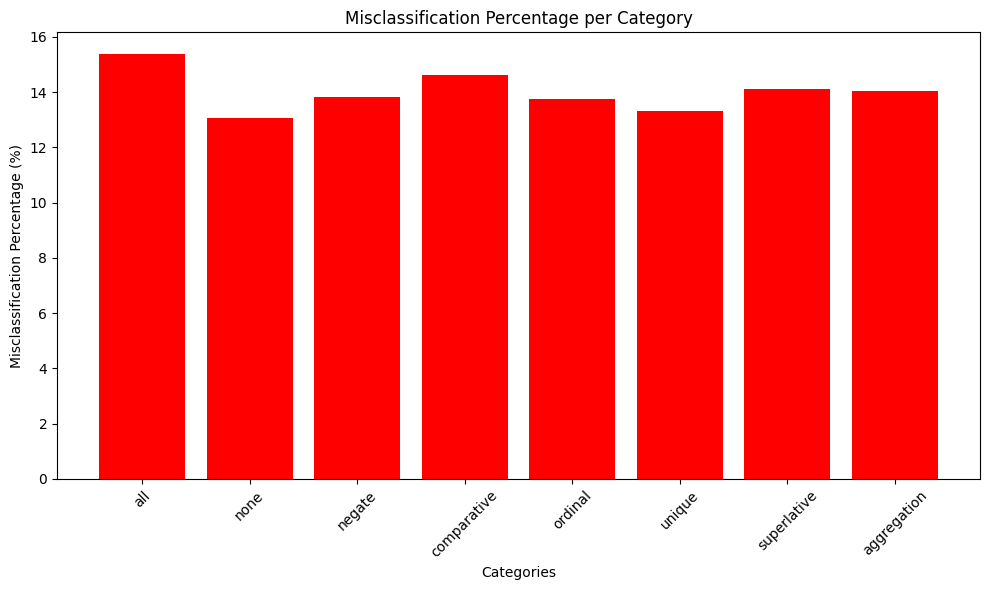

In [17]:
their_categorised_claims_file_name = "Error_Analysis/categorised_claims_mistral.json"
their_categorised_claims = load_json(their_categorised_claims_file_name)

our_categorised_claims_file_name = "Error_Analysis/our_category_claims_mistral.json"
our_categorised_claims = load_json(our_categorised_claims_file_name)

our_categorised_claims_bis_file_name = "Error_Analysis/our_category_claims_bis_mistral.json"
our_categorised_claims_bis = load_json(our_categorised_claims_bis_file_name)

their_category_misclassifications = { 
        "all": 0, "none": 0, "negate": 0, "comparative": 0, 
        "ordinal": 0, "unique": 0, "superlative": 0, "aggregation": 0
    }

our_category_misclassifications = {
    "single_attribute_verification": 0,
    "negation_absence_check": 0,
    "numerical_threshold_check": 0,
    "aggregation_computation": 0,
    "record_existence": 0,
    "comparative_analysis": 0,
    "conditional_logic": 0
    }

our_category_misclassifications_bis = {
    "unclear_or_noisy_language": 0,
    "numerical_reasoning": 0,
    "multistep_logic": 0,
    "negation": 0
}

category_percentages = calculate_misclassifications(predictions, their_categorised_claims, their_category_misclassifications)
plot_misclassifications(category_percentages)

In [ ]:
plot_misclassifications_with_overall_misclassification(predictions=predictions, category_percentages=category_percentages)

In [ ]:
category_counts = count_claims_per_category(their_categorised_claims)
plot_category_counts(category_counts)

In [ ]:
plot_category_cooccurrence(their_categorised_claims)

In [ ]:
predictions_file_names = [
'../docs/results/results_with_cells_phi4:latest_test_examples_1695_zero_shot_naturalized.json',
'../docs/results/results_with_cells_phi4:latest_test_examples_1695_zero_shot_markdown.json',
'../docs/results/results_with_cells_phi4:latest_test_examples_1380_chain_of_thought_naturalized.json',
'../docs/results/results_with_cells_deepseek-r1:32b_test_examples_765_zero_shot_naturalized.json',
'../docs/results/results_with_cells_deepseek-r1:8b_test_examples_1695_zero_shot_markdown.json',
'../docs/results/results_with_cells_mistral:latest_test_examples_1695_chain_of_thought_naturalized.json',
'../docs/results/results_with_cells_llama3.2:latest_test_examples_463_chain_of_thought_naturalized.json',
'results_20250212/results_CodeGeneration_test_examples_zero_shot_naturalized_phi4.json',
'results_20250217/results_CodeGeneration_test_examples_sql_zero_shot_naturalized_phi4.json',
]

list_of_predictions = [load_json(predictions_file) for predictions_file in predictions_file_names]

list_of_predictions_names = [
'phi4 zero shot naturalized',
'phi4 zero shot markdown',
'phi4 chain of thought naturalized',
'deepseek-r1:32b zero shot naturalized',
'deepseek-r1:8b zero shot markdown',
'mistral chain of thought naturalized',
'llama3.2 chain of thought naturalized',
'phi4 chain of thought python generation',
'phi4 chain of thought sql generation'
]

accuracies = [accuracy(predictions) for predictions in list_of_predictions]

misclassifications = [calculate_misclassifications(predictions, their_categorised_claims, their_category_misclassifications) for predictions in list_of_predictions]
plot_comparison(misclassifications, accuracies, list_of_predictions_names)

### OUR CATEGORIES

In [ ]:
category_percentages = calculate_misclassifications(predictions, our_categorised_claims, our_category_misclassifications)
plot_misclassifications_with_overall_misclassification(predictions=predictions, category_percentages=category_percentages)

In [ ]:
misclassifications = [calculate_misclassifications(predictions, our_categorised_claims, our_category_misclassifications) for predictions in list_of_predictions]
plot_comparison(misclassifications, accuracies, list_of_predictions_names)

In [ ]:
predictions_file_names = [
'../docs/results/results_with_cells_phi4:latest_test_examples_1695_zero_shot_naturalized.json',
'../docs/results/results_with_cells_phi4:latest_test_examples_1695_zero_shot_markdown.json',
'../docs/results/results_with_cells_phi4:latest_test_examples_1380_chain_of_thought_naturalized.json',
'../docs/results/results_with_cells_deepseek-r1:32b_test_examples_765_zero_shot_naturalized.json',]

list_of_predictions = [load_json(predictions_file) for predictions_file in predictions_file_names]

list_of_predictions_names = [
'phi4 zero shot naturalized',
'phi4 zero shot markdown',
'phi4 chain of thought naturalized',
'deepseek-r1:32b zero shot naturalized',
]

accuracies = [accuracy(predictions) for predictions in list_of_predictions]
misclassifications = [calculate_misclassifications(predictions, our_categorised_claims, our_category_misclassifications) for predictions in list_of_predictions]
plot_comparison(misclassifications, accuracies, list_of_predictions_names)

### OUR CATEGORIES BIS

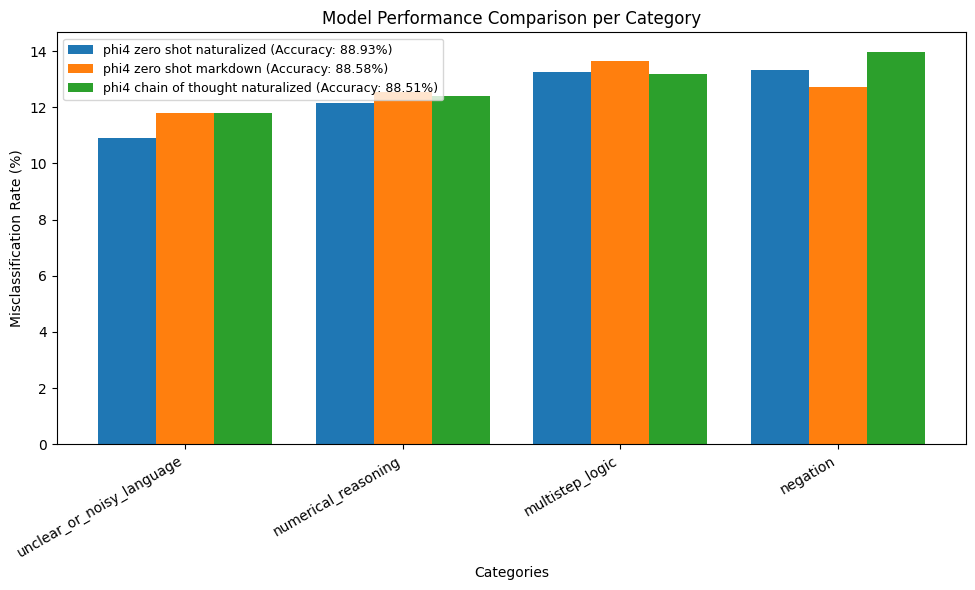

In [19]:
predictions_file_names = [
'../docs/results/results_with_cells_phi4:latest_test_examples_1695_zero_shot_naturalized.json',
'../docs/results/results_with_cells_phi4:latest_test_examples_1695_zero_shot_markdown.json',
'../docs/results/results_with_cells_phi4:latest_test_examples_1380_chain_of_thought_naturalized.json',
]
list_of_predictions = [load_json(predictions_file) for predictions_file in predictions_file_names]

list_of_predictions_names = [
'phi4 zero shot naturalized',
'phi4 zero shot markdown',
'phi4 chain of thought naturalized',
]

accuracies = [accuracy(predictions) for predictions in list_of_predictions]
misclassifications = [calculate_misclassifications(predictions, our_categorised_claims_bis, our_category_misclassifications_bis) for predictions in list_of_predictions]
plot_comparison(misclassifications, accuracies, list_of_predictions_names)

# Helper functions

In [ ]:
def split_claims(claims_list):
    misclassified = []
    correctly_classified = []

    for claim_data in claims_list:
        if claim_data["predicted_response"] != claim_data["true_response"]:
            misclassified.append(claim_data["claim"])
        else:
            correctly_classified.append(claim_data["claim"])

    return misclassified[:50], correctly_classified[:50]

# Example usage
misclassified_claims, correctly_classified_claims = split_claims(predictions_1)
for m in misclassified_claims:
    print(m)
    print()


print("\n\nHere are correctly classified claims:\n\n")

for c in correctly_classified_claims:
    print(c)
    print()

In [ ]:
def find_files_with_max_elements(path_name):
    max_elements = 0
    files_with_max_elements = []

    # Iterate through all files in the folder
    for filename in os.listdir(path_name):
        if filename.endswith('.json'):
            file_path = os.path.join(path_name, filename)
            
            # Open the JSON file and load its content
            with open(file_path, 'r') as file:
                data = json.load(file)
                
                # Check the number of objects (elements) in the list
                num_elements = len(data)
                
                # Update max_elements and the corresponding filenames
                if num_elements > max_elements:
                    max_elements = num_elements
                    files_with_max_elements = [filename]
                elif num_elements == max_elements:
                    files_with_max_elements.append(filename)

    return files_with_max_elements

# Example usage
path_name = '../docs/results'  # Replace with the path to your folder
files = find_files_with_max_elements(path_name)
print("Files with the maximum number of elements:")
for file in files:
    print(file)